# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The datasets are loaded for train, validation and test from the Pickle files.

In [1]:
def load_data(filename):
    import pickle
    import os
    root = os.getcwd()+ '/traffic-signs-data/'
    with open(root + filename, mode='rb') as f:
        data = pickle.load(f)
    assert (len(data['features']) == len(data['labels']))
    return data['features'], data['labels']

In [2]:
x_train, y_train = load_data('train.p')
x_validation, y_validation = load_data('test.p')
x_test, y_test = load_data('valid.p')
x_augmented, y_augmented = load_data('transforms.p')

---

## Step 1: Dataset Summary & Exploration



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
def get_data_summary(feature, label):
    import numpy as np
    # What's the shape of an traffic sign image?
    image_shape = feature[0].shape
    # How many unique classes/labels there are in the dataset.
    unique_classes, n_samples = np.unique(label,
                                          return_index=False,
                                          return_inverse=False,
                                          return_counts=True)
    n_classes = len(unique_classes)
    n_samples = n_samples.tolist()
    print("Image data shape =", image_shape)
    return image_shape[0], image_shape[2], n_classes, n_samples


def train_test_examples(x_train, x_validation, x_test):
    # Number of training examples
    n_train = len(x_train)
    # Number of validation examples
    n_validation = len(x_validation)
    # Number of testing examples.
    n_test = len(x_test)
    print("Number of training examples =", n_train)
    print("Number of validation examples =", n_validation)
    print("Number of testing examples =", n_test)

In [4]:
input_h, input_channels, n_classes, n_samples = get_data_summary(x_train, y_train)
input_aug_h, input_aug_channels, n_aug_classes, n_aug_samples = get_data_summary(x_augmented, y_augmented)
train_test_examples(x_train, x_validation, x_test)

Image data shape = (32, 32, 3)
Image data shape = (32, 32, 3)
Number of training examples = 34799
Number of validation examples = 12630
Number of testing examples = 4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
def get_classes_samples(index, labels):
    return [i for i, _x_ in enumerate(labels) if _x_ == index]


def loopover_data(index, x, y, high_range, steps):
    import matplotlib.pyplot as plt
    % matplotlib inline
    images = get_classes_samples(index, y)
    _images_ = images[:high_range:steps] if len(images) > 100 else images
    imgaes_in_row = int(high_range/steps)
    fig, axes = plt.subplots(1, imgaes_in_row, figsize=(15, 15))
    for _index, image_index in enumerate(_images_):
        image = x[image_index].squeeze()
        axes[_index].imshow(image)
    plt.show()


def visualize_data(x, y, n_classes, n_samples, high_range=160, steps=20, show_desc=True, single_class=False):
    from pandas.io.parsers import read_csv
    label_signs = read_csv('signnames.csv').values[:, 1]  # fetch only sign names
    if single_class:
        loopover_data(n_classes, x, y, high_range, steps)
    else:
        for index in range(n_classes):
            if show_desc:
                print("Class {} -- {} -- {} samples".format(index + 1, label_signs[index], n_samples[index]))
            loopover_data(index, x, y, high_range, steps)

Class 1 -- Speed limit (20km/h) -- 180 samples


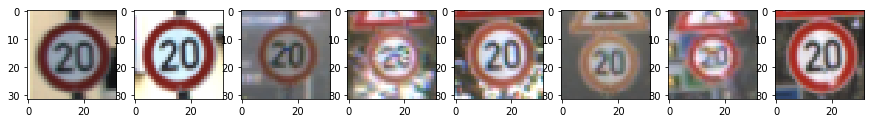

Class 2 -- Speed limit (30km/h) -- 1980 samples


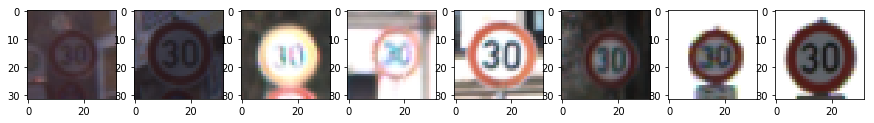

Class 3 -- Speed limit (50km/h) -- 2010 samples


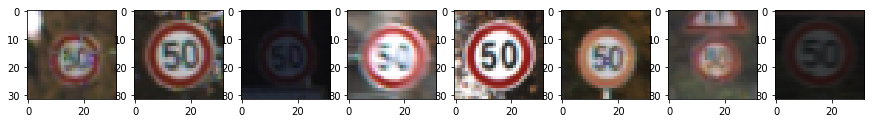

Class 4 -- Speed limit (60km/h) -- 1260 samples


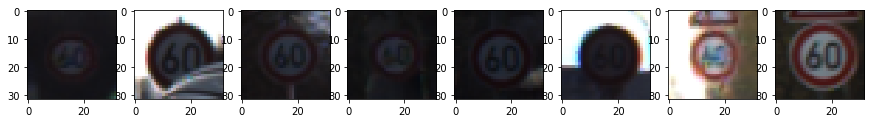

Class 5 -- Speed limit (70km/h) -- 1770 samples


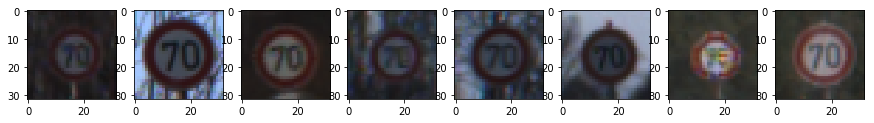

Class 6 -- Speed limit (80km/h) -- 1650 samples


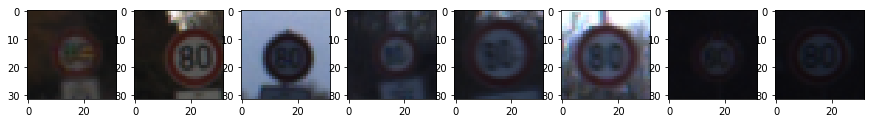

Class 7 -- End of speed limit (80km/h) -- 360 samples


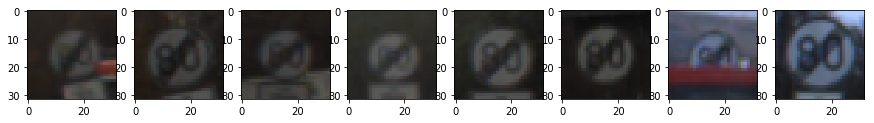

Class 8 -- Speed limit (100km/h) -- 1290 samples


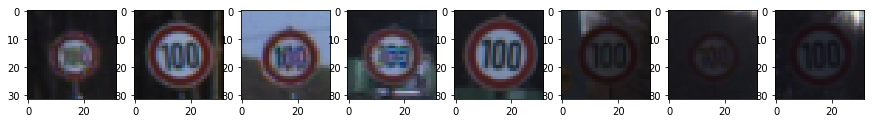

Class 9 -- Speed limit (120km/h) -- 1260 samples


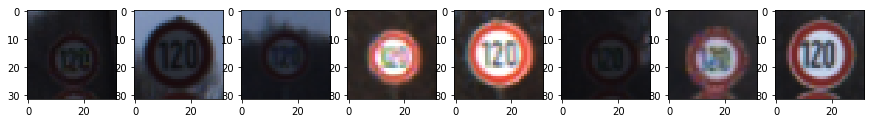

Class 10 -- No passing -- 1320 samples


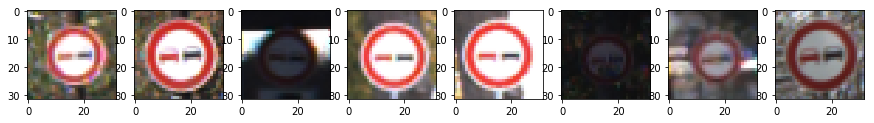

Class 11 -- No passing for vehicles over 3.5 metric tons -- 1800 samples


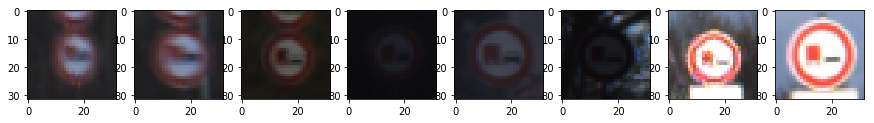

Class 12 -- Right-of-way at the next intersection -- 1170 samples


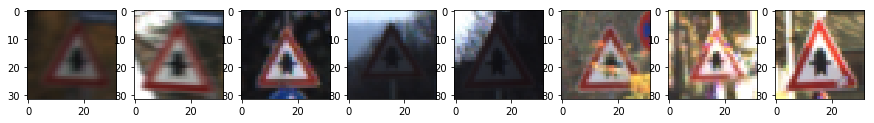

Class 13 -- Priority road -- 1890 samples


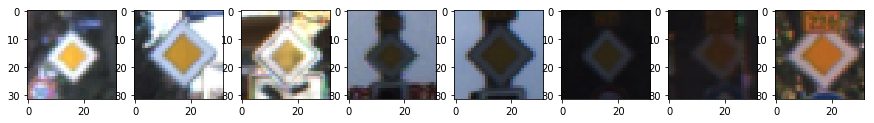

Class 14 -- Yield -- 1920 samples


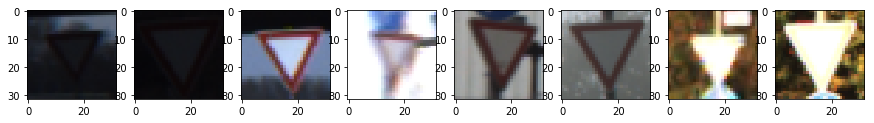

Class 15 -- Stop -- 690 samples


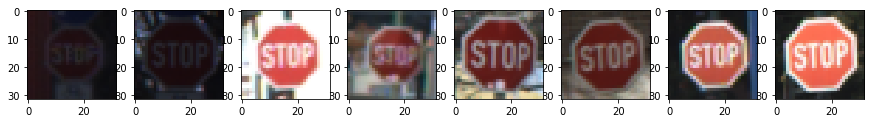

Class 16 -- No vehicles -- 540 samples


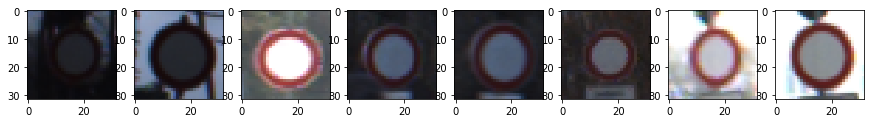

Class 17 -- Vehicles over 3.5 metric tons prohibited -- 360 samples


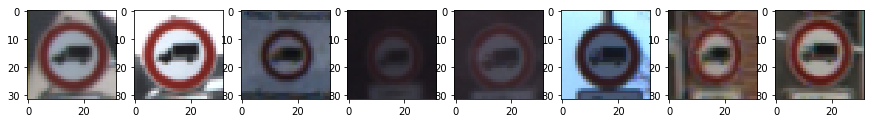

Class 18 -- No entry -- 990 samples


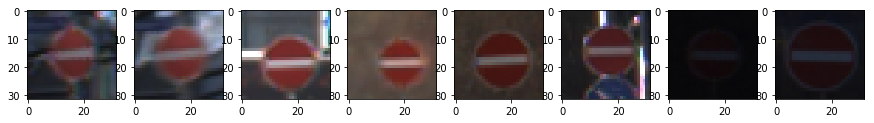

Class 19 -- General caution -- 1080 samples


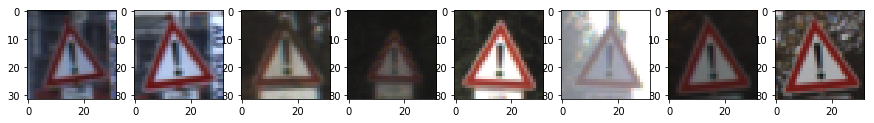

Class 20 -- Dangerous curve to the left -- 180 samples


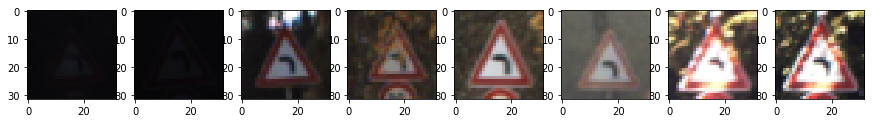

Class 21 -- Dangerous curve to the right -- 300 samples


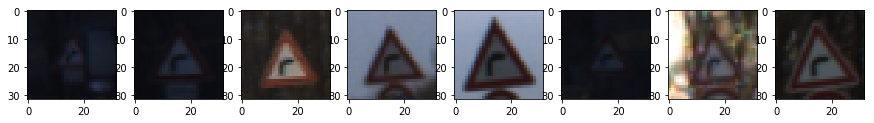

Class 22 -- Double curve -- 270 samples


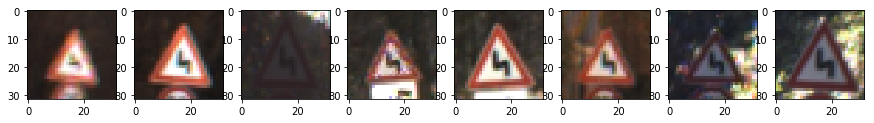

Class 23 -- Bumpy road -- 330 samples


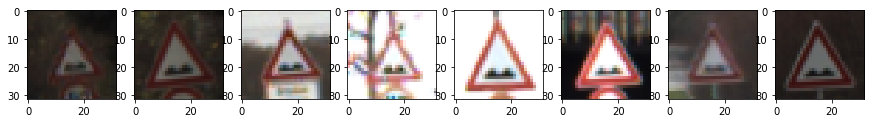

Class 24 -- Slippery road -- 450 samples


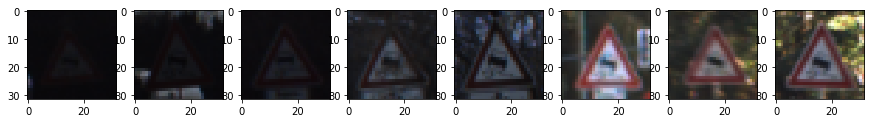

Class 25 -- Road narrows on the right -- 240 samples


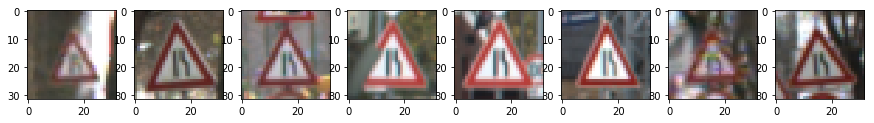

Class 26 -- Road work -- 1350 samples


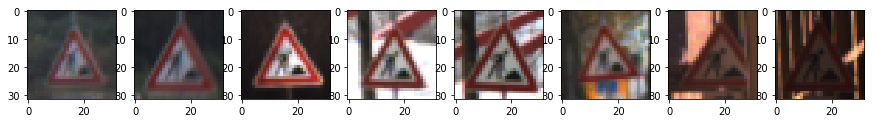

Class 27 -- Traffic signals -- 540 samples


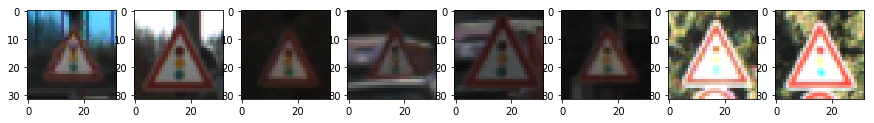

Class 28 -- Pedestrians -- 210 samples


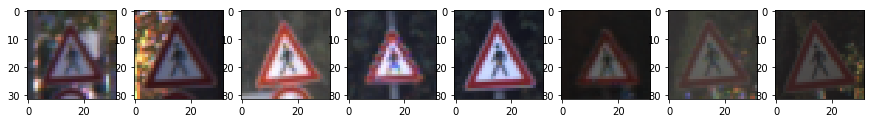

Class 29 -- Children crossing -- 480 samples


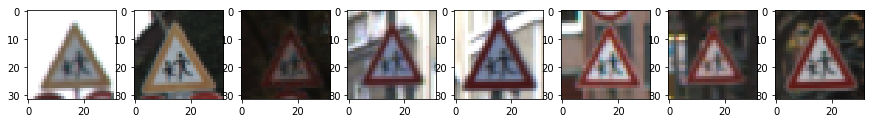

Class 30 -- Bicycles crossing -- 240 samples


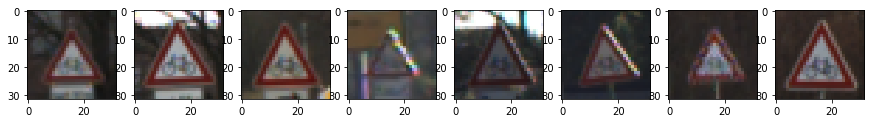

Class 31 -- Beware of ice/snow -- 390 samples


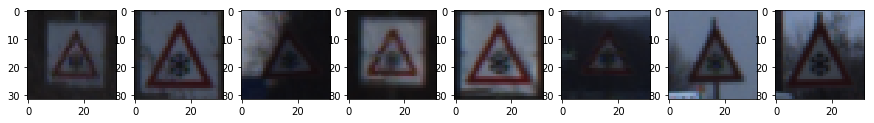

Class 32 -- Wild animals crossing -- 690 samples


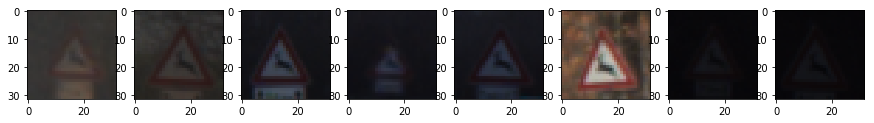

Class 33 -- End of all speed and passing limits -- 210 samples


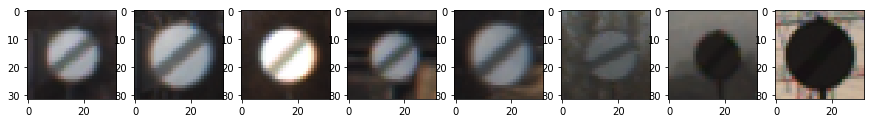

Class 34 -- Turn right ahead -- 599 samples


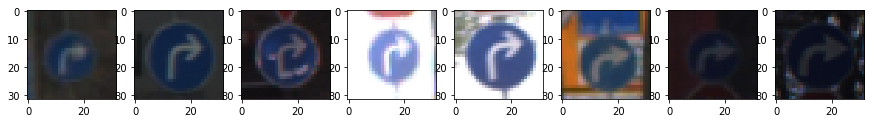

Class 35 -- Turn left ahead -- 360 samples


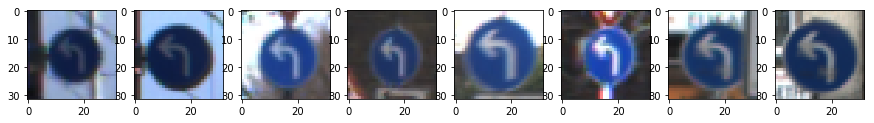

Class 36 -- Ahead only -- 1080 samples


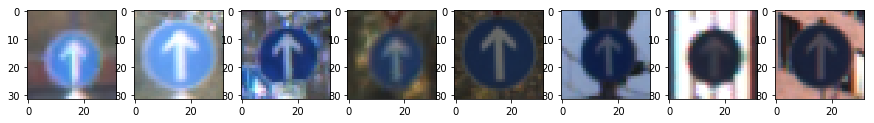

Class 37 -- Go straight or right -- 330 samples


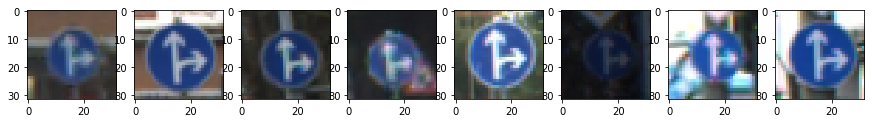

Class 38 -- Go straight or left -- 180 samples


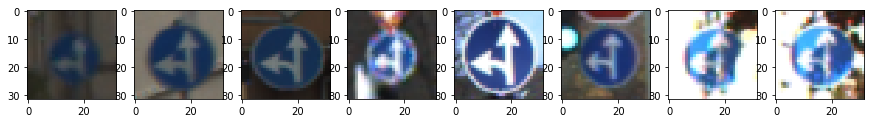

Class 39 -- Keep right -- 1860 samples


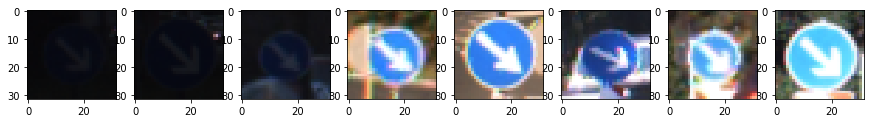

Class 40 -- Keep left -- 270 samples


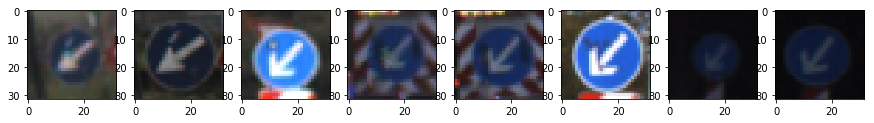

Class 41 -- Roundabout mandatory -- 300 samples


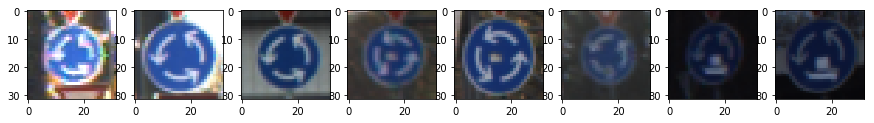

Class 42 -- End of no passing -- 210 samples


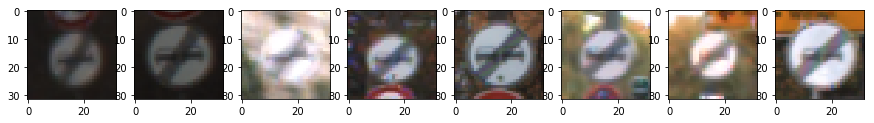

Class 43 -- End of no passing by vehicles over 3.5 metric tons -- 210 samples


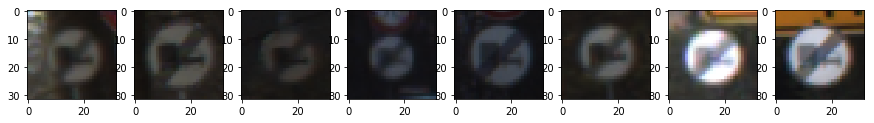

In [6]:
visualize_data(x_train, y_train, n_classes, n_samples)

In [7]:
def histogram_data(x, n_samples, n_classes):
    import matplotlib.pyplot as plt
    width = 1 / 1.2
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111)
    ax.set_title('Samples Distribution')
    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of Samples')
    plt.bar(range(n_classes), n_samples, width, color="blue")
    plt.show()

#### Labels distribution in Train Dataset.

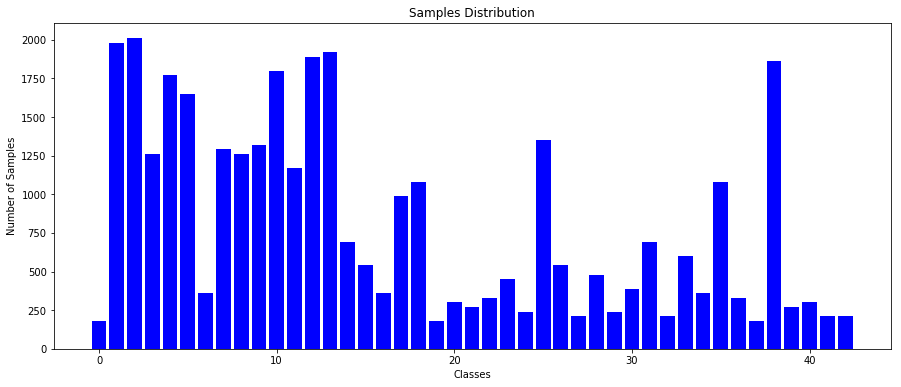

In [8]:
histogram_data(x_test, n_samples, n_classes)

#### Labels distribution in Augmented Dataset.

Image data shape = (32, 32, 3)


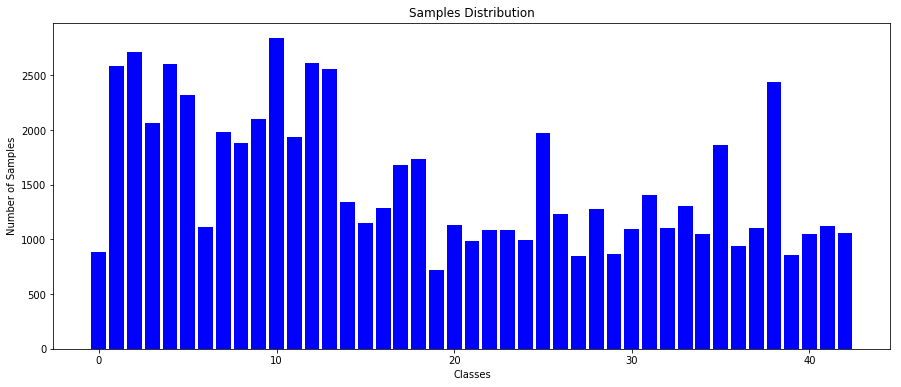

In [9]:
import numpy as np
from sklearn.utils import shuffle
x_train = np.append(x_train, x_augmented, axis=0)
y_train = np.append(y_train, y_augmented)
x_train, y_train = shuffle(x_train, y_train)
input_h, input_channels, n_classes, n_samples = get_data_summary(x_train, y_train)
histogram_data(x_train, n_samples, n_classes)

#### Labels distribution in Test Dataset.

Image data shape = (32, 32, 3)


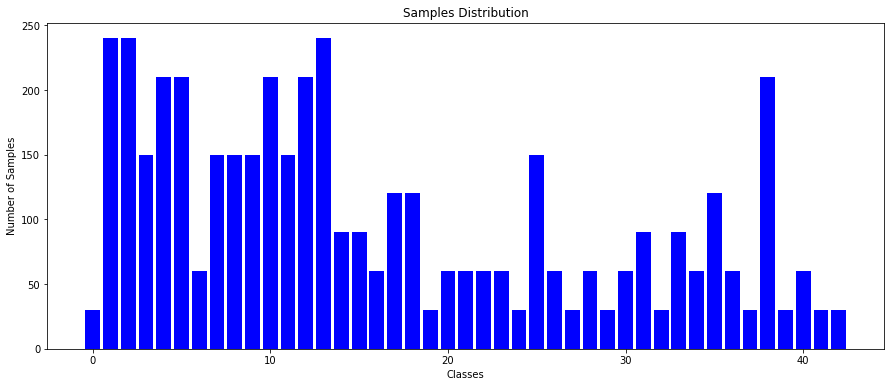

In [10]:
input_h, input_channels, n_classes, n_samples = get_data_summary(x_test, y_test)
histogram_data(x_test, n_samples, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

The train, validation and test datasets are normalized using Feature Rescaling.

The images are then transformed to 3 channel grayscale using OpenCV.

In [11]:
def grayscale(x):
    import cv2 as cv
    import numpy as np
    for index, image in enumerate(x):
        gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
        im2 = np.zeros_like(image)
        im2[:, :, 0], im2[:, :, 1], im2[:, :, 2] = gray, gray, gray
        x[index] = im2
    return x


def normalizer(x):
    import numpy as np
    x_min = float(np.min(x))
    x_max = float(np.max(x))
    x = (x - x_min) / (x_max - x_min)
    return x


def pre_process(features, labels, is_train=False):
    from sklearn.utils import shuffle
    assert (len(features) == len(labels))
    features = grayscale(features)
    features = normalizer(features)
    if is_train:
        features, labels = shuffle(features, labels)
    return features, labels

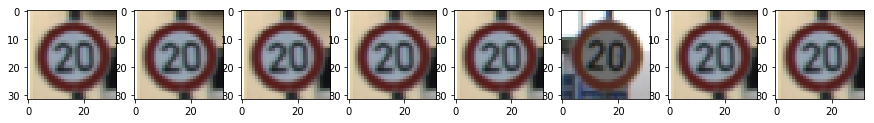

In [12]:
visualize_data(x_train, y_train, 1, n_samples, show_desc=False)

In [13]:
x_train_p, y_train_p = pre_process(x_train, y_train, is_train=False)
x_validation_p, y_validation_p = pre_process(x_validation, y_validation)
x_test_p, y_test_p = pre_process(x_test, y_test)

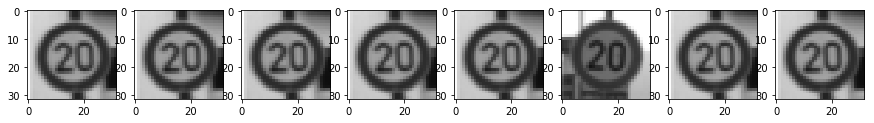

In [14]:
visualize_data(x_train_p, y_train_p, 1, n_samples, show_desc=False)

### Image Transformations and Rotations:

In [15]:
def visualize_augmented_features(features, labels, index, images_in_row=1):
    import matplotlib.pyplot as plt
    from random import choice
    %matplotlib inline
    indices = get_classes_samples(index, labels)
    fig, axes = plt.subplots(1, images_in_row, figsize=(15, 15))
    for index in range(images_in_row):
        random_index = choice(indices)
        image = features[random_index].squeeze()
        axes[index].imshow(image)
    plt.show()
    
    
def perform_rotation(image, cols, rows):
    from random import randint
    import cv2
    center = (int(cols / 2), int(cols / 2))
    angle = randint(-12, 12)
    transformer = cv2.getRotationMatrix2D(center, angle, 1)
    image = cv2.warpAffine(image, transformer, (cols, rows))
    return image


def perform_translation(image, cols, rows, value):
    import cv2
    import numpy as np
    transformer = np.float32([[1, 0, value], [0, 1, value]])
    image = cv2.warpAffine(image, transformer, (cols, rows))
    return image

    
def perform_transformation(feature, label):
    from random import randint
    transform_level = 10
    rows, cols, channels = feature.shape
    rotational_value = randint(-int(rows / transform_level), int(rows / transform_level))
    image = perform_rotation(feature, cols, rows)
    image = perform_translation(image, cols, rows, rotational_value)
    return image, label


def augment_dataset(features, labels, n_classes):
    from random import randint
    from sklearn.utils import shuffle
    import numpy as np
    transforms_per_image = 20
    iterations = 100
    augmented_features, augmented_labels = [], []
    for _i_ in range(iterations):
        for i in range(transforms_per_image):
            # get a random class from 0 to 42
            random_class = randint(0, n_classes)
            # select 10 features and labels of that class
            selected_index = get_classes_samples(random_class, labels)[random_class:random_class + 1]
            # print("index: ", selected_index)
            selected_labels = labels[selected_index]
            # perform transformation in each of the features
            for index, transform_y in zip(selected_index, selected_labels):
                # get rows and cols of the image
                transform_x = features[index]
                rows, cols, channels = transform_x.shape
                # create several transforms from a single image
                for value in range(-int(rows), int(rows), 4):
                    # perform transformations on the image
                    aug_x, aug_y = perform_transformation(transform_x, transform_y)
                    augmented_features.append(aug_x)
                    augmented_labels.append(aug_y)
    # append the results of transformations
    augmented_features, augmented_labels = shuffle(augmented_features, augmented_labels)
    augmented_features = np.array(augmented_features)
    # assertion
    assert (len(augmented_features) == len(augmented_labels))
    return augmented_features, augmented_labels

#### Visualize how the transformation is performed.

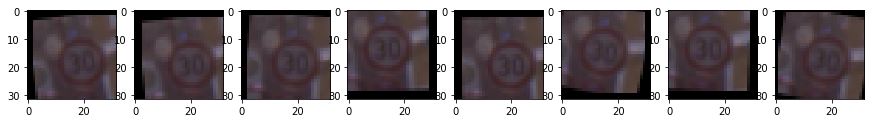

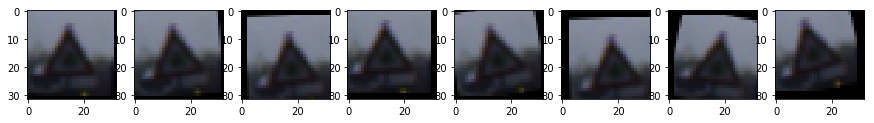

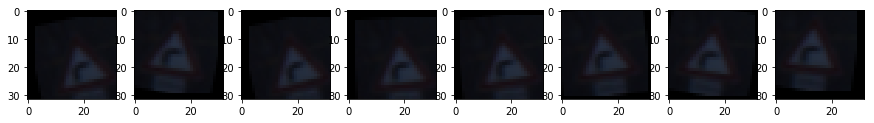

In [16]:
aug_x, aug_y = load_data('transforms2.p')
visualize_augmented_features(aug_x, aug_y, 1, images_in_row=8)
visualize_augmented_features(aug_x, aug_y, 30, images_in_row=8)
visualize_augmented_features(aug_x, aug_y, 20, images_in_row=8)

### Implementation of Model


Firstly, I defined the implementation of:

1- Filter Weights and Bias calculation.
2- Convolutional Layer.
3- Fully Connected Layer.
4- Output Layer.
5- Finding Number of Parameters in each of the Layers.

In [17]:
def get_weights_biases(mu, sd, input_channels, output_channels):
    import tensorflow as tf
    """
    tensorflow filter size formula for valid padding:
            Hf = H - Ho*Hs + 1
            Wf = W - Wo*Ws + 1
            Df = K
    """
    w = {
        'c1': tf.Variable(tf.truncated_normal([5, 5, input_channels, 6], mean=mu, stddev=sd)),
        'c2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sd)),
        'fc1': tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sd)),
        'fc2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sd)),
        'out': tf.Variable(tf.truncated_normal([84, output_channels], mean=mu, stddev=sd)),
    }
    b = {
        'c1': tf.Variable(tf.truncated_normal([6], mean=mu, stddev=sd)),
        'c2': tf.Variable(tf.truncated_normal([16], mean=mu, stddev=sd)),
        'fc1': tf.Variable(tf.truncated_normal([120], mean=mu, stddev=sd)),
        'fc2': tf.Variable(tf.truncated_normal([84], mean=mu, stddev=sd)),
        'out': tf.Variable(tf.truncated_normal([output_channels], mean=mu, stddev=sd))
    }
    return w, b


def convolution_layer(x, w, b, st, padding, pool_k, pool_st, dropout):
    import tensorflow as tf
    conv = tf.nn.conv2d(x, filter=w, strides=st, padding=padding)
    conv = tf.nn.bias_add(conv, bias=b)
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=pool_k, strides=pool_st, padding=padding)
    conv = tf.nn.dropout(conv, keep_prob=dropout)
    return conv


def full_connected_layer(fc, w, b, dropout):
    import tensorflow as tf
    fc = tf.add(tf.matmul(fc, w), b)
    fc = tf.nn.relu(fc)
    fc = tf.nn.dropout(fc, keep_prob=dropout)
    return fc


def output_layer(fc, w, b):
    import tensorflow as tf
    out = tf.add(tf.matmul(fc, w), b)
    return out


def n_parameters(layer1, layer2, layer3, layer4, layer5):
    # parameter sharing is assumed
    dim = layer1.get_shape()[3]
    layer1_params = dim * (5 * 5 * 1) + dim * 1
    dim = layer2.get_shape()[3]
    layer2_params = dim * (5 * 5 * 6) + dim * 1
    dim = layer3.get_shape()[1]
    layer3_params = dim * 400 + dim * 1
    dim = layer4.get_shape()[1]
    layer4_params = dim * 120 + dim * 1
    dim = layer5.get_shape()[1]
    layer5_params = dim * 84 + dim * 1
    total_params = layer1_params + layer2_params + layer3_params + layer4_params + layer5_params

    print("Layer 1 Params: {}".format(layer1_params))
    print("Layer 2 Params: {}".format(layer2_params))
    print("Layer 3 Params: {}".format(layer3_params))
    print("Layer 4 Params: {}".format(layer4_params))
    print("Layer 5 Params: {}".format(layer5_params))
    print("Total Params:   {}".format(total_params))

Now, I implemented the Model of LeNet Architecture. It consists of 2 Convolutional Layers with 0.9 dropouts followed by 2 Fully Connected Layers with 0.6 and 0.5 dropouts respectively. Last layer is the Fullt Connected layer in which activation function is found.

In [18]:
def le_net(_x_, mu, stddev, dropouts, input_channels=1, output_channels=10):
    from tensorflow.contrib.layers import flatten
    train_dropouts = {
        'c1': dropouts[0],
        'c2': dropouts[1],
        'fc1': dropouts[2],
        'fc2': dropouts[3],
    }
    w, b = get_weights_biases(mu, stddev, input_channels, output_channels)
    padding = 'VALID'
    k = 2
    st, pool_st, pool_k = [1, 1, 1, 1], [1, k, k, 1], [1, k, k, 1]
    # Layer 1 -- convolution layer:
    conv1 = convolution_layer(_x_, w['c1'], b['c1'], st, padding, pool_k, pool_st, train_dropouts['c1'])
    # Layer 2 -- convolution layer:
    conv2 = convolution_layer(conv1, w['c2'], b['c2'], st, padding, pool_k, pool_st, train_dropouts['c2'])
    # Flatten
    fc1 = flatten(conv2)
    # Layer 3 -- fully connected layer:
    fc1 = full_connected_layer(fc1, w['fc1'], b['fc1'], train_dropouts['fc1'])
    # Layer 4 -- full connected layer:
    fc2 = full_connected_layer(fc1, w['fc2'], b['fc2'], train_dropouts['fc2'])
    # Layer 5 -- fully connected output layer:
    out = output_layer(fc2, w['out'], b['out'])
    # parameters in each layer
    n_parameters(conv1, conv2, fc1, fc2, out)
    return out

The Hyperparameters of the Network are defined.

In [19]:
hyper_params = {
    "mu": 0,
    "stddev": 0.1,
    "epoch": 25,
    "batch_size": 128,
    "rate": 0.001,
    "dropouts": [.9, .9, .6, .5],
    "test_dropouts": [1., 1., 1., 1.]
}

TensorFlow placeholders for LeNet are defined.

In [20]:
from sklearn.utils import shuffle
import tensorflow as tf
save_file = './model/lenet'
x = tf.placeholder(tf.float32, [None, input_h, input_h, input_channels])
y = tf.placeholder(tf.int32, [None])
one_hot_y = tf.one_hot(y, n_classes)
dropouts = tf.placeholder(tf.float32, [None])

The logits, Softmax Probabilities, Cross Entropy (Losses), Cost are defined. Then AdamOptimizer is used to optimize the network parameters using Backpropogation. The Accuracy is defined for the forward pass of the network.

In [21]:
logits = le_net(x, hyper_params['mu'], hyper_params['stddev'], dropouts, input_channels, n_classes)
soft_max_prb = tf.nn.softmax(logits=logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
cost = tf.reduce_mean(cross_entropy)  # loss operation
# using adam optimizer rather than stochastic grad descent [https://arxiv.org/pdf/1412.6980v7.pdf]
optimizer = tf.train.AdamOptimizer(learning_rate=hyper_params['rate']).minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, axis=1), tf.argmax(one_hot_y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Layer 1 Params: 156
Layer 2 Params: 2416
Layer 3 Params: 48120
Layer 4 Params: 10164
Layer 5 Params: 3655
Total Params:   64511


TensorFlow global vairiables are initialized and an instance of Model Saver class is created.

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Method is defined to get the batches from the train data.

In [ ]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


def get_batches(_batch_size_, _features_, _labels_):
    import math
    total_size, index, batch = len(_features_), 0, []
    n_batches = int(math.ceil(total_size / _batch_size_)) if _batch_size_ > 0 else 0
    for _i_ in range(n_batches - 1):
        batch.append([_features_[index:index + _batch_size_],
                      _labels_[index:index + _batch_size_]])
        index += _batch_size_
    batch.append([_features_[index:], _labels_[index:]])
    return batch

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Note: Set retrain_model to True if you want to retrain the model. Alternatively you can use already trained model.

In [ ]:
retrain_model = False
if retrain_model:
    with tf.Session() as sess:
        sess.run(init)
        print("Training....")
        for e in range(hyper_params['epoch']):
            # training the network
            x_train_p, y_train_p = shuffle(x_train_p, y_train_p)
            batches = get_batches(hyper_params['batch_size'], x_train_p, y_train_p)
            for batch_x, batch_y in batches:
                batch_x, batch_y = shuffle(batch_x, batch_y)
                sess.run(optimizer, feed_dict={
                    x: batch_x, y: batch_y,
                    dropouts: hyper_params['dropouts']
                })
            # validation the network
            validation_accuracy = sess.run(accuracy, feed_dict={
                x: x_validation_p, y: y_validation_p,
                dropouts: hyper_params['test_dropouts']
            })
            print("{}th epoch - before: {:2.3f}%".format(e + 1, validation_accuracy * 100))
        saver.save(sess, save_file)
    print("Model saved")

Training....
1th epoch - before: 65.376%
2th epoch - before: 79.557%
3th epoch - before: 83.903%
4th epoch - before: 86.469%
5th epoch - before: 88.599%
6th epoch - before: 89.438%
7th epoch - before: 89.739%
8th epoch - before: 90.530%
9th epoch - before: 90.665%
10th epoch - before: 91.354%


Now, the train model is tested on the hidden test data.

In [ ]:
test_data = True
if test_data:
    with tf.Session() as sess:
        saver.restore(sess, save_file)
        print("Model restored")
        test_accuracy = sess.run(accuracy, feed_dict={
            x: x_test_p,
            y: y_test_p,
            dropouts: hyper_params['test_dropouts']
        })
        print("test accuracy: {:2.3f}%".format(test_accuracy * 100))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
def fetch_images_from_folder(folder):
    import numpy as np
    import cv2 as cv
    import os
    import fnmatch
    _images = []
    _cwd_ = os.getcwd() 
    for root, dir_names, file_names in os.walk(_cwd_ + folder):
        for filename in fnmatch.filter(file_names, '*.png'):
            img = cv.imread(os.path.join(_cwd_ + folder, os.path.join(root, filename)))
            if img is not None:
                _images.append(img)
    return np.array(_images)


def get_new_test_data(folder):
    features = fetch_images_from_folder(folder)
    labels = [15,  # no vehicle
              19,  # Dangerous curve to the left
              29,  # Bicycles crossing
              40,  # Roundabout mandatory
              35,  # Ahead only
              26,  # Traffic signals
              26,  # Traffic signals
              40,  # Roundabout mandatory
              26,  # Traffic signals
              26,  # Traffic signals
              23,  # Slippery road
              26,  # Traffic signals
              12,  # Priority road
              12,  # Priority road
              36,  # Go straight or right
              13,  # Yield
              40   # Roundabout mandatory
              ]
    assert (len(features) == len(labels))
    return features, labels


def traffic_sign_name(_id_):
    from pandas.io.parsers import read_csv
    sign_name = read_csv('signnames.csv').values[_id_][1]
    return sign_name

In [ ]:
x_test_new, y_test_new, file_names = get_new_test_data('/test-data/')

In [ ]:
def visualize_test_images(x, is_single=False):
    import matplotlib.pyplot as plt
    % matplotlib inline
    if is_single:
        x = x.squeeze()
        plt.figure(figsize=(2, 2))
        plt.imshow(x)
    else:
        fig, axes = plt.subplots(1, 5, figsize=(15, 15))
        for index, image in enumerate(x):
            image = image.squeeze()
            axes[index].imshow(image)
    plt.show()

In [ ]:
visualize_test_images(x_test_new)

In [ ]:
x_test_new_p, y_test_new_p = pre_process(x_test_new, y_test_new)
visualize_test_images(x_test_new)

### Predict the Sign Type for Each Image

### Analyze Performance

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, save_file)
    new_test_accuracy = sess.run(accuracy, feed_dict={
        x: x_test_new_p,
        y: y_test_new_p,
        dropouts: hyper_params['test_dropouts']
    })
    print("New Test Accuracy: {:2.3f}%".format(new_test_accuracy*100))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

In [ ]:
test_new_data = True
if test_new_data:
    with tf.Session() as sess:
        x_test_new, y_test_new, file_names = get_new_test_data('/test-data/')
        x_test_new_p, y_test_new_p = pre_process(x_test_new, y_test_new)
        saver.restore(sess, save_file)
        predicted_logits = sess.run(accuracy, feed_dict={
            x: x_test_new_p,
            y: y_test_new_p,
            dropouts: hyper_params['test_dropouts']
        })
        prediction_probabilities = sess.run(soft_max_prb, feed_dict={
            x: x_test_new_p,
            dropouts: hyper_params['test_dropouts']
        })
        print("predicted logits: {}\n".format(predicted_logits))
        top_p, top_i = sess.run(tf.nn.top_k(tf.constant(prediction_probabilities), k=5))
        for index in range(len(top_p)):
            visualize_test_images(x_test_new[index], is_single=True)
            print(file_names[index])
            for p, i in zip(top_p[index], top_i[index]):
                print("{}:  {:2.3f}%".format(traffic_sign_name(i), p * 100))
            print("\n")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")